In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Carbon footprint of swiss people

In [2]:
carbonfootprint_df = pd.read_csv("data/swiss-carbon-footprint.csv")

In [3]:
sum = carbonfootprint_df["carbon_footprint"].sum()

sum_goodsandservice = carbonfootprint_df[carbonfootprint_df['sector'] == "goods and services"].carbon_footprint.sum()
sum_food = carbonfootprint_df[carbonfootprint_df['sector'] == "food"].carbon_footprint.sum()
sum_transport = carbonfootprint_df[carbonfootprint_df['sector'] == "transport"].carbon_footprint.sum()
sum_housing = carbonfootprint_df[carbonfootprint_df['sector'] == "housing"].carbon_footprint.sum()

carbonfootprint_df.loc[len(carbonfootprint_df)] = {'category': 'goods and services', 'sector': '', 'carbon_footprint': sum_goodsandservice}
carbonfootprint_df.loc[len(carbonfootprint_df)] = {'category': 'food', 'sector': '', 'carbon_footprint': sum_food}
carbonfootprint_df.loc[len(carbonfootprint_df)] = {'category': 'transport', 'sector': '', 'carbon_footprint': sum_transport}
carbonfootprint_df.loc[len(carbonfootprint_df)] = {'category': 'housing', 'sector': '', 'carbon_footprint': sum_housing}

carbonfootprint_df['proportion'] = round(carbonfootprint_df['carbon_footprint']/sum*100, 2)

carbonfootprint_df.head(3)

,category,sector,carbon_footprint,proportion
0,"Education, social and financial services",goods and services,821,7.06
1,Health,goods and services,627,5.39
2,Restaurants and hotels,goods and services,569,4.89


In [4]:
fig = px.sunburst(carbonfootprint_df, 
                  names='category', 
                  parents='sector', 
                  values='carbon_footprint',
                  custom_data=['proportion'],
                  hover_name='category',
                  hover_data={
                    "sector": False,
                    "category": False,
                    "carbon_footprint": True,
                    "proportion": ":.2f"
                    },         
                  branchvalues = 'total',
                  color_discrete_sequence = ['lightcoral', 'turquoise', 'orange', 'cornflowerblue'], 
                  title='Repartition of the carbon footprint of a swiss person')

fig.update_traces(hovertemplate=
    "<b>%{label}</b><br>" +
    "Carbon footprint: %{value} kg CO₂eq<br>" +
    "Proportion: %{customdata[0]}%")

fig.show()

# Water

In [5]:
water_df = pd.read_csv("data/global-freshwater-use-over-the-long-run.csv")

water_df.head(3)

,Entity,Code,Year,Freshwater use
0,BRICS,NaN,1901,301174824608
1,BRICS,NaN,1902,313252195793
2,BRICS,NaN,1903,283825062307


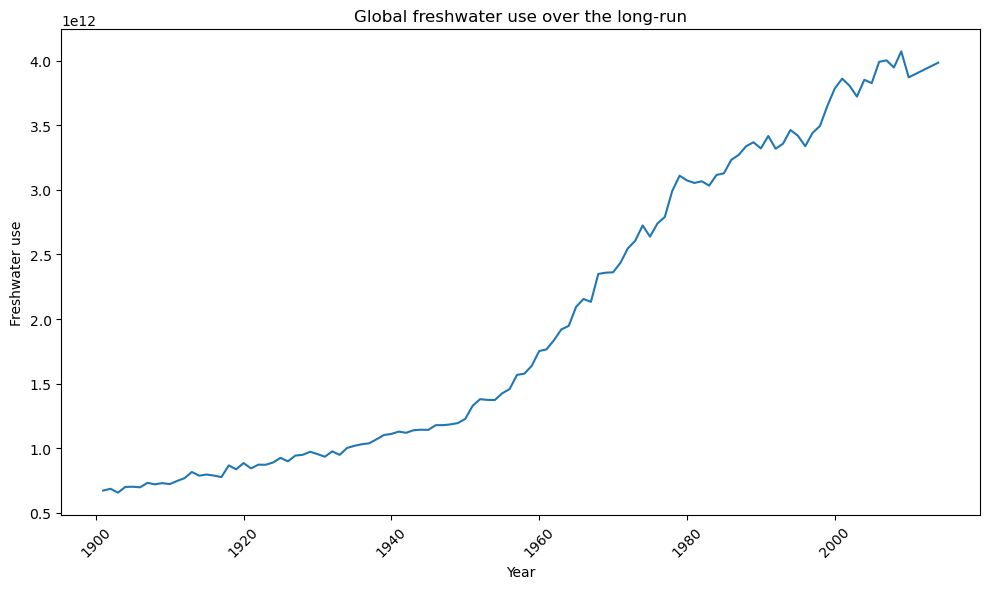

In [6]:
water_df_world = water_df[water_df["Entity"] == "World"]

plt.figure(figsize=(10, 6))
sns.lineplot(data=water_df_world, x='Year', y='Freshwater use')
plt.xlabel('Year')
plt.ylabel('Freshwater use')
plt.title('Global freshwater use over the long-run')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()